In [94]:
library(sets)
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=16, repr.plot.height=12)

sets_options("universe", seq(1, 120, 0.5))

In [95]:
variables <- set(
  temperature = fuzzy_partition(varnames = c(cold = 30, good = 70, hot = 90),
                                sd = 5.0),
  humidity = fuzzy_partition(varnames = c(dry = 30, good = 60, wet = 80), 
                             sd = 3.0),
  precipitation = fuzzy_partition(varnames = c(no.rain = 30, little.rain = 60,
                                               rain = 90), sd = 7.5),
  weather = fuzzy_partition(varnames = c(bad = 40, ok = 65, perfect = 80),
                            FUN = fuzzy_cone, radius=10)
)


In [96]:
# Fuzzy rules
rules <- set(
  fuzzy_rule(temperature %is% good && humidity %is% dry &&
               precipitation %is% no.rain, weather %is% perfect),
  fuzzy_rule(temperature %is% hot && humidity %is% wet &&
               precipitation %is% rain, weather %is% bad),
  fuzzy_rule(temperature %is% cold, weather %is% bad),
  fuzzy_rule(temperature %is% good || humidity %is% good ||
               precipitation %is% little.rain, weather %is% ok),
  fuzzy_rule(temperature %is% hot && precipitation %is% little.rain,
             weather %is% ok),
  fuzzy_rule(temperature %is% hot && humidity %is% dry &&
               precipitation %is% little.rain, weather %is% ok)
)


In [97]:
model <- fuzzy_system(variables, rules)


In [98]:
print(model)


A fuzzy system consisting of 4 variables and 6 rules.

Variables:

weather(bad, ok, perfect)
humidity(dry, good, wet)
temperature(cold, good, hot)
precipitation(no.rain, little.rain, rain)

Rules:

temperature %is% hot && precipitation %is% little.rain => weather %is% ok
temperature %is% hot && humidity %is% dry && precipitation %is%  => weather %is% ok
    little.rain => weather %is% ok
temperature %is% hot && humidity %is% wet && precipitation %is%  => weather %is% bad
    rain => weather %is% bad
temperature %is% good && humidity %is% dry && precipitation %is%  => weather %is% perfect
    no.rain => weather %is% perfect
temperature %is% good || humidity %is% good || precipitation %is%  => weather %is% ok
    little.rain => weather %is% ok
temperature %is% cold => weather %is% bad


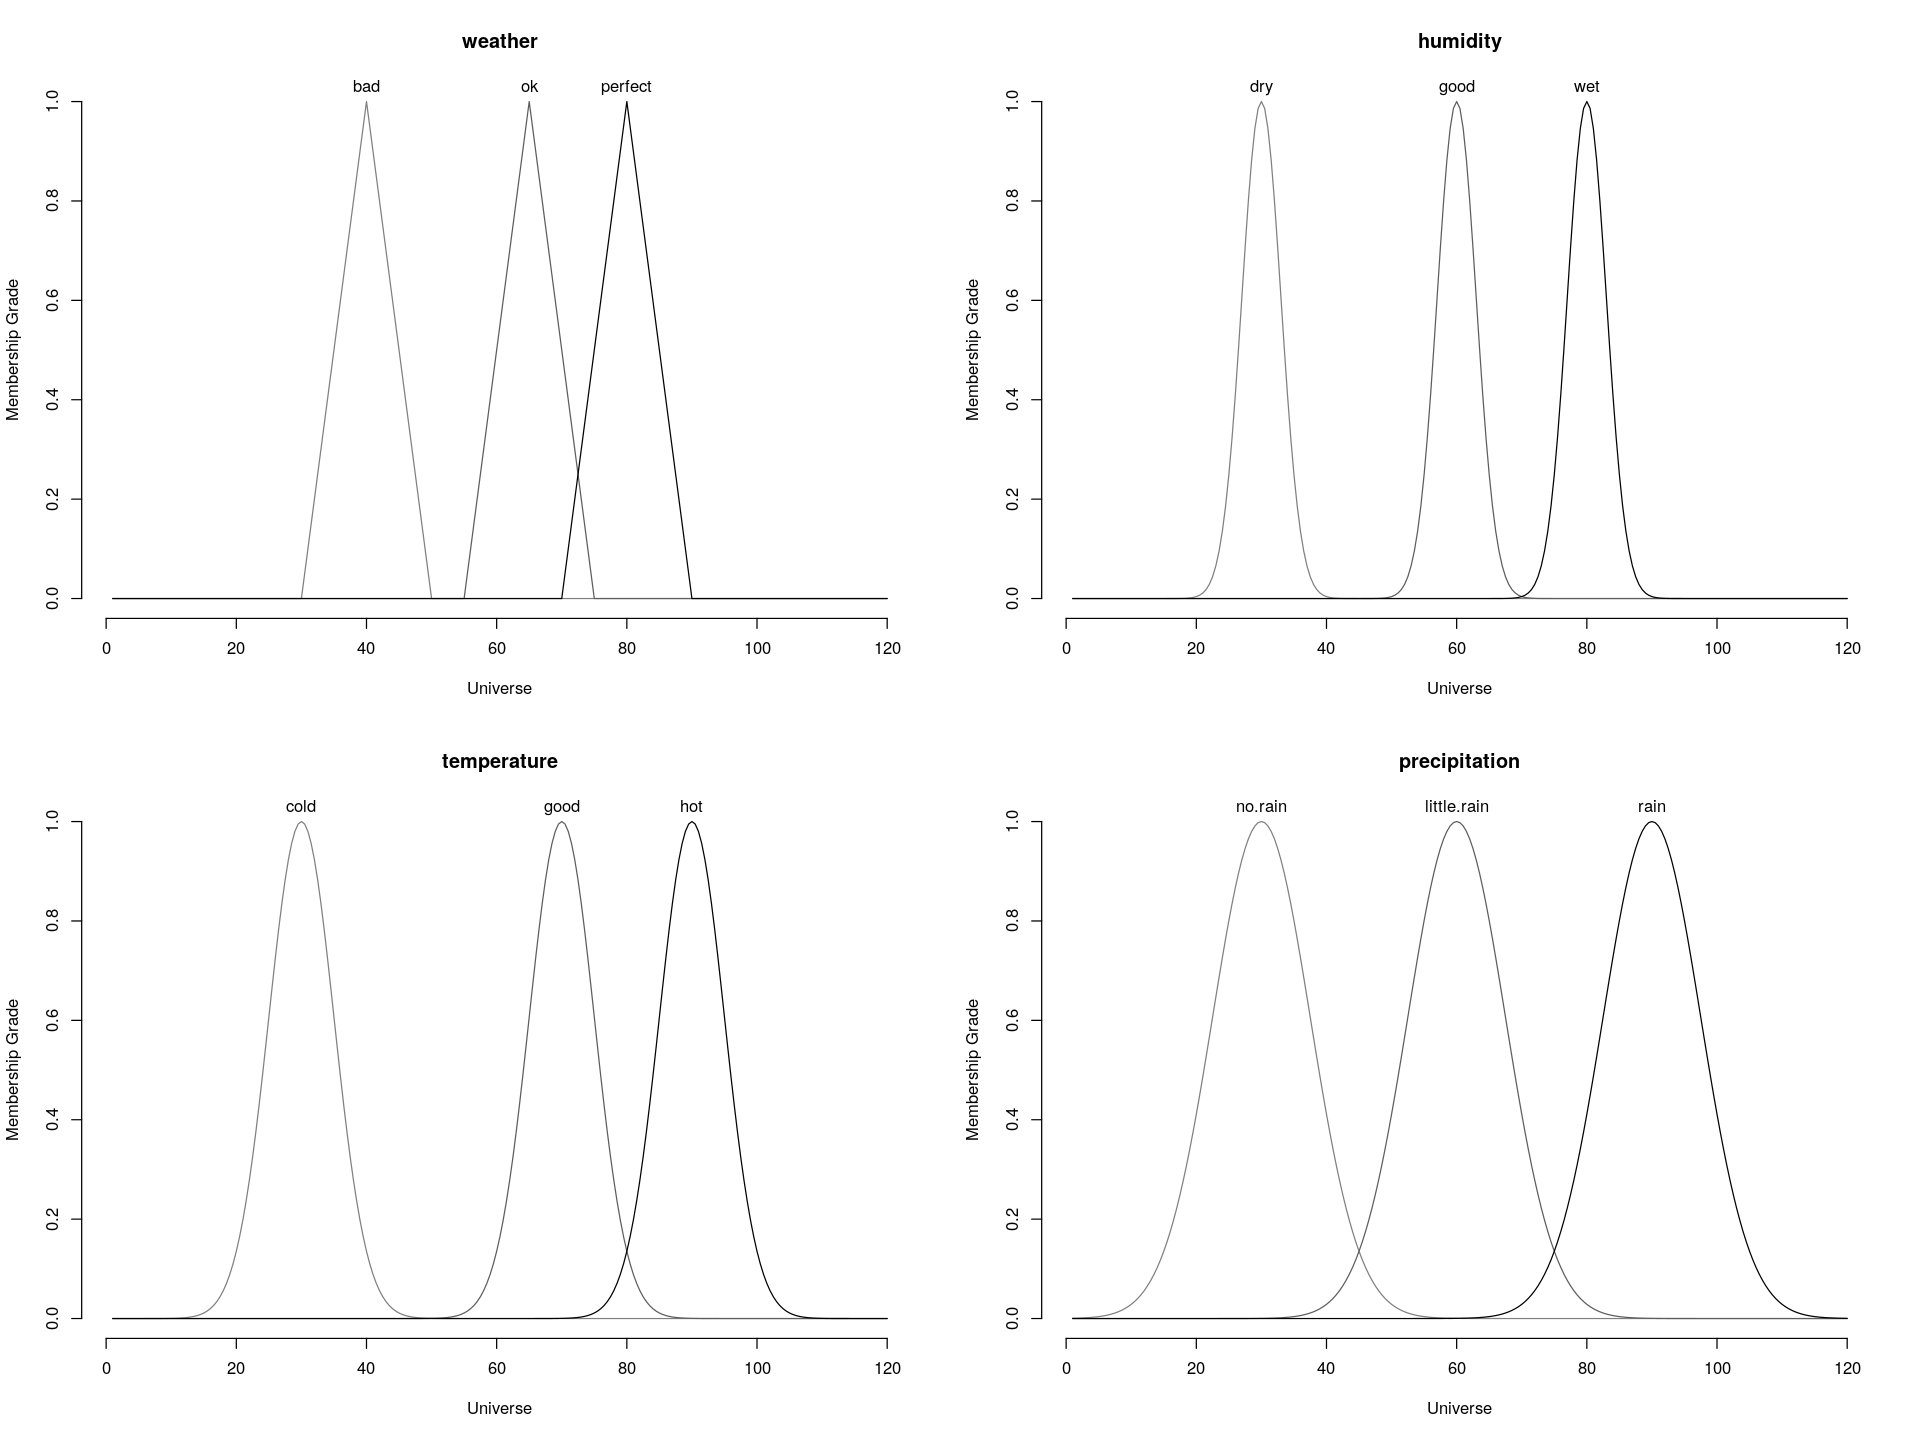

In [99]:
plot(model)


In [100]:
example.3 <- fuzzy_inference(model, list(temperature = 30, humidity = 80,
                                       precipitation = 80))


In [92]:
gset_defuzzify(example.3, "centroid")


[1] 41.32

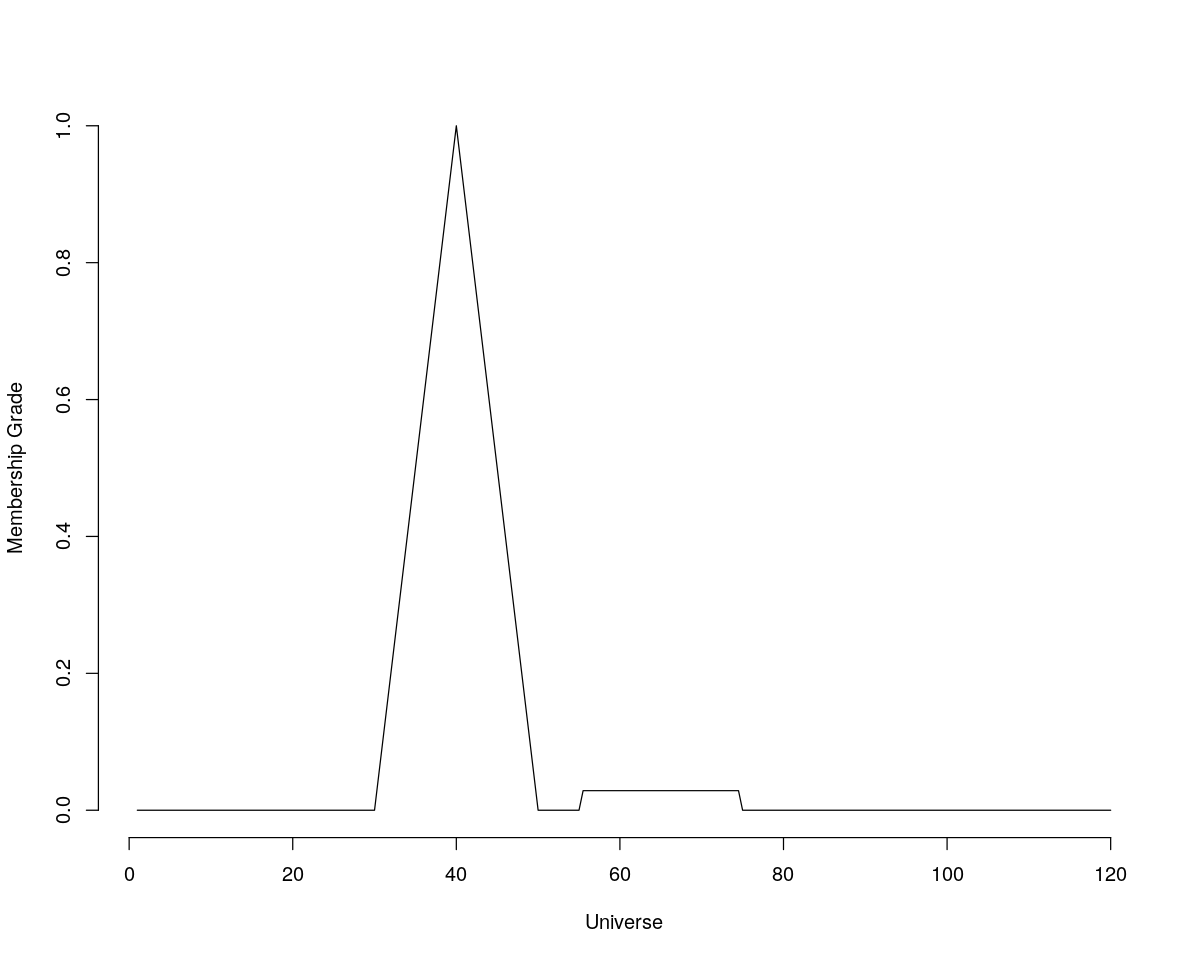

In [93]:
plot(example.3)

In [45]:
example.2 <- fuzzy_inference(model, list(temperature = 170, humidity = 0,
                                       precipitation = 70))
gset_defuzzify(example.2, "centroid")


[1] 65

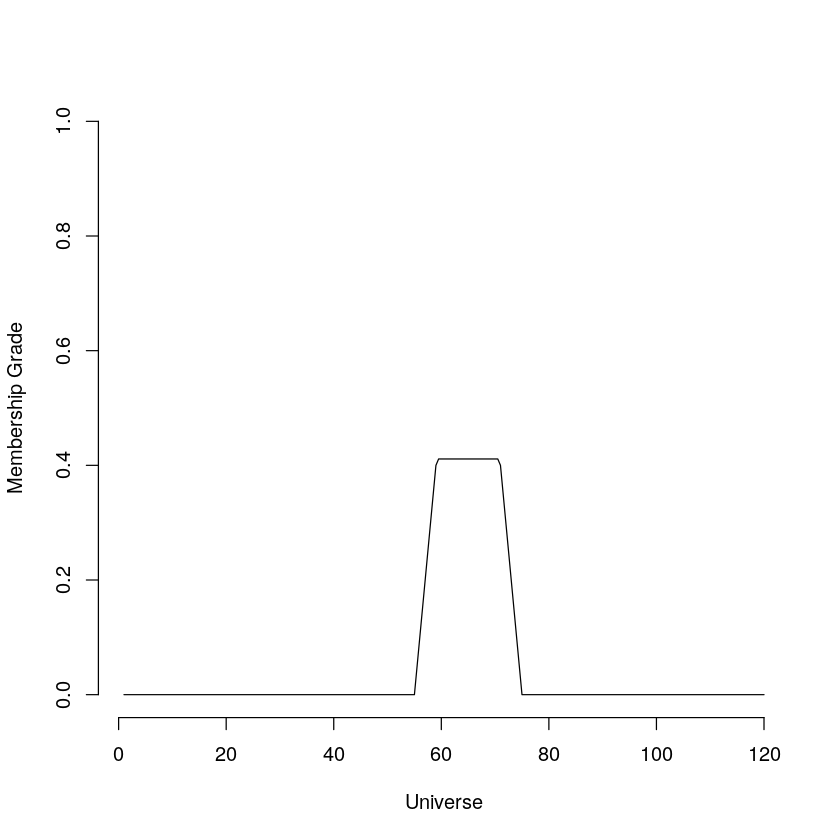

In [46]:
plot(example.2)

In [101]:
model

A fuzzy system consisting of 4 variables and 6 rules.

Variables:

weather(bad, ok, perfect)
humidity(dry, good, wet)
temperature(cold, good, hot)
precipitation(no.rain, little.rain, rain)

Rules:

temperature %is% hot && precipitation %is% little.rain => weather %is% ok
temperature %is% hot && humidity %is% dry && precipitation %is%  => weather %is% ok
    little.rain => weather %is% ok
temperature %is% hot && humidity %is% wet && precipitation %is%  => weather %is% bad
    rain => weather %is% bad
temperature %is% good && humidity %is% dry && precipitation %is%  => weather %is% perfect
    no.rain => weather %is% perfect
temperature %is% good || humidity %is% good || precipitation %is%  => weather %is% ok
    little.rain => weather %is% ok
temperature %is% cold => weather %is% bad